In [2]:
import ProjectV2.get_texts as GetTexts
from ProjectV2.comment import Comment
import ProjectV2.topic_build as Topical
import ProjectV2.feature_extract as feature_extract
import os
from sklearn.externals import joblib
import numpy as np

#Read the file
print("Reading file")


#Read in the files
sarcComments = GetTexts.read_file("ProjectV2/Sarc Set.csv")
negComments = GetTexts.read_file("ProjectV2/Non Sarc Set.csv")

# #Uncomment the following when the desired data is already in the system
# sarcComments = np.load("WebSite/app/SarcFiles/25kFiles/sarccoms.npy")
# negComments = np.load("WebSite/app/SarcFiles/25kFiles/negcoms.npy")

print("Done reading file")

#Pass the comments to the topic to fit the data
print("Topic time")
topic_mod = Topical.topic(nbtopic=200,alpha='symmetric')
topic_mod.fit(np.concatenate((sarcComments,negComments)))

#Print 20 of the topics
print("Topics finished properly")
for i in range (0,20):
    print(topic_mod.get_topic(i))

print("The feature is beginning")

cls_set = ['Non-Sarcastic', 'Sarcastic']
sarcfeaturesets = []
negfeaturesets = []

#Deal with sarcastic comments
index = 0
for com in sarcComments:
    # com = com.text
    sarcfeaturesets.append((feature_extract.getallfeatureset(com, topic_mod), cls_set[1]))
    index += 1

#Deal with non sarcastic comments
index = 0
for com in negComments:
    #com = com.text
    negfeaturesets.append((feature_extract.getallfeatureset(com, topic_mod), cls_set[0]))
    index += 1 

C:\Users\Jamie\PycharmProjects\MastersProj\ProjectV2\venv\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Reading file
Done reading file
Topic time


C:\Users\Jamie\PycharmProjects\MastersProj\ProjectV2\venv\lib\site-packages\gensim\models\ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


Topics finished properly
0.189*"anyon" + 0.131*"amaz" + 0.125*"worth" + 0.120*"goe" + 0.098*"tho" + 0.087*"clearli" + 0.076*"extra" + 0.043*"howev" + 0.031*"solut" + 0.030*"atleast"
0.489*"also" + 0.106*"quit" + 0.100*"close" + 0.090*"today" + 0.060*"higher" + 0.034*"child" + 0.034*"would" + 0.023*"pizza" + 0.020*"known" + 0.013*"killer"
0.328*"op" + 0.129*"follow" + 0.087*"karma" + 0.080*"disagre" + 0.072*"fp" + 0.060*"technic" + 0.057*"monster" + 0.051*"catch" + 0.048*"twist" + 0.031*"22"
0.179*"class" + 0.129*"entir" + 0.111*"develop" + 0.107*"shitti" + 0.097*"hurt" + 0.086*"fault" + 0.073*"piss" + 0.057*"rich" + 0.042*"shrink" + 0.039*"hors"
0.249*"room" + 0.212*"lie" + 0.126*"blame" + 0.084*"statement" + 0.060*"grind" + 0.046*"review" + 0.046*"hunt" + 0.035*"victim" + 0.032*"comey" + 0.031*"spi"
0.545*"seem" + 0.078*"crash" + 0.078*"tip" + 0.056*"biggest" + 0.055*"europ" + 0.055*"like" + 0.028*"tournament" + 0.027*"leaf" + 0.016*"hoax" + 0.014*"trainer"
0.625*"see" + 0.202*"read" 

From this the desire is to print correlation matrices to show which features are strongly correlated and to print which topics are most associated with sarcasm


In [15]:
print(len(sarcfeaturesets))

21182


In [46]:
dictionary = {}
count=0
for sarc in negfeaturesets:
    for features in sarc:
        for key in features:
            if "Topic" in key:
                num = ""
                for word in key.split():
                    word = word[1:]
                    if word.isdigit():
                        num = str(word)
                        # print(num)
                if num in dictionary:
                    dictionary[num]+=1
                else:
                    dictionary[num]=1

print(len(dictionary))
print(dictionary)
    

200
{'66': 508, '93': 859, '132': 855, '199': 726, '1': 663, '80': 487, '87': 500, '112': 699, '129': 328, '151': 281, '51': 300, '55': 507, '83': 450, '114': 1380, '133': 1353, '108': 541, '120': 1143, '186': 700, '23': 443, '26': 399, '106': 85, '163': 506, '195': 512, '45': 196, '126': 215, '154': 298, '79': 1185, '84': 922, '109': 699, '116': 791, '130': 430, '6': 740, '92': 628, '12': 597, '40': 1337, '58': 754, '89': 1042, '141': 743, '57': 301, '63': 474, '145': 989, '190': 886, '62': 302, '81': 708, '86': 377, '121': 539, '170': 218, '181': 606, '22': 515, '7': 435, '10': 240, '33': 510, '77': 296, '159': 200, '165': 507, '182': 753, '183': 216, '3': 276, '61': 596, '64': 459, '96': 475, '144': 202, '158': 571, '162': 643, '20': 590, '174': 430, '192': 515, '37': 301, '98': 473, '134': 632, '149': 463, '168': 372, '35': 889, '56': 425, '76': 303, '180': 366, '69': 410, '194': 768, '124': 333, '157': 568, '18': 583, '101': 876, '13': 350, '17': 863, '166': 536, '43': 305, '44': 

In [47]:
sorteddict=[(k, dictionary[k]) for k in sorted(dictionary, key=dictionary.get, reverse=True)]
    

In [48]:
print(sorteddict)

[('94', 1612), ('114', 1380), ('133', 1353), ('40', 1337), ('79', 1185), ('120', 1143), ('89', 1042), ('145', 989), ('146', 960), ('15', 943), ('84', 922), ('8', 918), ('35', 889), ('190', 886), ('101', 876), ('17', 863), ('93', 859), ('132', 855), ('142', 849), ('139', 830), ('184', 804), ('173', 801), ('116', 791), ('194', 768), ('88', 764), ('58', 754), ('182', 753), ('141', 743), ('6', 740), ('199', 726), ('95', 722), ('81', 708), ('21', 702), ('186', 700), ('112', 699), ('109', 699), ('196', 685), ('1', 663), ('164', 654), ('72', 645), ('162', 643), ('78', 641), ('134', 632), ('92', 628), ('181', 606), ('12', 597), ('61', 596), ('31', 591), ('20', 590), ('18', 583), ('156', 583), ('158', 571), ('157', 568), ('85', 546), ('108', 541), ('121', 539), ('166', 536), ('32', 535), ('22', 515), ('192', 515), ('195', 512), ('0', 511), ('33', 510), ('66', 508), ('55', 507), ('165', 507), ('163', 506), ('87', 500), ('80', 487), ('148', 485), ('179', 478), ('96', 475), ('63', 474), ('98', 473

In [49]:
topicdict={}
count=0
for key,value in sorteddict[0:20]:
    topic = (topic_mod.get_topic(int(key)))
    # commontopics[count]=[]
    topicar=[]
    for words in topic.split():
        word=""
        for letter in words:
            if letter.isalpha():
                word+=letter
        if len(word) >0:
            topicar.append(word)
    topicdict[count]=topicar
    count+=1

In [50]:
print(topicdict)

{0: ['like', 'would', 'look', 'beauti', 'zone', 'access', 'measur', 'decad', 'interact', 'marijuana'], 1: ['get', 'either', 'funni', 'tax', 'insid', 'certain', 'author', 'mask', 'misogynist', 'snow'], 2: ['one', 'end', 'joke', 'care', 'old', 'ad', 'gone', 'depress', 'paint', 'thick'], 3: ['time', 'would', 'rememb', 'war', 'impress', 'sometim', 'figur', 'finish', 'camera', 'yeah'], 4: ['make', 'two', 'build', 'mod', 'edit', 'iron', 'expens', 'energi', 'resourc'], 5: ['could', 'tri', 'long', 'suck', 'came', 'til', 'wife', 'harder', 'buff', 'husband'], 6: ['think', 'past', 'suppos', 'compani', 'excit', 'univers', 'prefer', 'separ', 'opportun', 'cp'], 7: ['well', 'give', 'made', 'damn', 'healthi', 'samsung', 'delici', 'know', 'sure', 'chanc'], 8: ['thank', 'us', 'call', 'friend', 'forget', 'lost', 'fake', 'leak', 'ss', 'chicken'], 9: ['want', 'someon', 'key', 'would', 'hell', 'impli', 'girlfriend', 'parent', 'print', 'cook'], 10: ['day', 'alway', 'show', 'save', 'system', 'beat', 'remov', 

In [25]:
print(sarcfeaturesets[0])

({'Capital': 0, 'exclamation': 1, 'contains(But)': 1.0, 'contains(they)': 1.0, 'contains(will)': 1.0, 'contains(have)': 1.0, 'contains(all)': 1.0, 'contains(those)': 1.0, 'contains(review)': 1.0, 'contains(But they)': 1.0, 'contains(they will)': 1.0, 'contains(will have)': 1.0, 'contains(have all)': 1.0, 'contains(all those)': 1.0, 'contains(those review)': 1.0, 'sentiment fhalf': 0.0, 'subjective fhalf': 0.0, 'sentiment shalf': 0.0, 'subjective shalf': 0.0, 'sentiment halfcontrast': 0.0, 'sentiment fthird': 0.0, 'subjective fthird': 0.0, 'sentiment sthird': 0.0, 'subjective sthird': 0.0, 'sentiment tthird': 0.0, 'subjective tthird': 0.0, 'sentiment 1/2contrast': 0.0, 'sentiment 1/3contrast': 0.0, 'sentiment 2/3contrast': 0.0, 'POS1': 1.0, 'POS2': 0.0, 'POS3': 1.0, 'POS4': 0.0, 'Topic :4': 0.50250006, 'lols': 0, 'happyemo': 0, 'sademo': 0}, 'Sarcastic')


In [52]:
import pandas as pd
dataframe = pd.DataFrame(sarcfeaturesets)
print(dataframe)

                                                       0          1
0      {'Capital': 0, 'exclamation': 1, 'contains(But...  Sarcastic
1      {'Capital': 0, 'exclamation': 0, 'contains(wow...  Sarcastic
2      {'Capital': 0, 'exclamation': 1, 'contains(Ho)...  Sarcastic
3      {'Capital': 0, 'exclamation': 0, 'contains(I)'...  Sarcastic
4      {'Capital': 0, 'exclamation': 0, 'contains(got...  Sarcastic
5      {'Capital': 0, 'exclamation': 0, 'contains(Hoi...  Sarcastic
6      {'Capital': 0, 'exclamation': 1, 'contains(Oh)...  Sarcastic
7      {'Capital': 0, 'exclamation': 0, 'contains(Han...  Sarcastic
8      {'Capital': 0, 'exclamation': 0, 'contains(I)'...  Sarcastic
9      {'Capital': 0, 'exclamation': 0, 'contains(can...  Sarcastic
10     {'Capital': 0, 'exclamation': 0, 'contains(Yea...  Sarcastic
11     {'Capital': 0, 'exclamation': 1, 'contains(Dud...  Sarcastic
12     {'Capital': 0, 'exclamation': 0, 'contains(I)'...  Sarcastic
13     {'Capital': 0, 'exclamation': 1, 'contain

In [102]:

def to_nice_array(featureset):
    capital=[]
    exclamation=[]
    sentimenthalfcontrast=[]
    sentiment12contrast=[] 
    sentiment13contrast=[] 
    sentiment23contrast=[]
    POS1=[] 
    POS2=[] 
    POS3=[] 
    POS4=[]
    lols=[]
    happyemo=[]
    sademo=[]
    labels=[]
    for bigfeature in featureset:
        features=bigfeature[0]
        capital.append(features['Capital'])
        exclamation.append((features['exclamation']))
        sentimenthalfcontrast.append(features['sentiment halfcontrast'])
        sentiment12contrast.append(features['sentiment 1/2contrast'])
        sentiment13contrast.append(features['sentiment 1/3contrast'])
        sentiment23contrast.append(features['sentiment 2/3contrast'])
        POS1.append(features['POS1'])
        POS2.append(features['POS2'])
        POS3.append(features['POS3']) 
        POS4.append(features['POS4'])
        lols.append(features['lols'])
        happyemo.append(features['happyemo'])
        sademo.append(features['sademo'])
        labels.append(bigfeature[1])
       
    return(pd.DataFrame(
        {"capital":capital,
        "exclamation":exclamation,
        "sentimenthalfcontrast":sentimenthalfcontrast,
        "sentiment12contrast":sentiment12contrast, 
        "sentiment13contrast":sentiment13contrast, 
        "sentiment23contrast":sentiment23contrast,
        "POS1":POS1,
        "POS2":POS2,
        "POS3":POS3, 
        "POS4":POS4,
        "lols":lols,
        "happyemo":happyemo,
        "sademo":sademo,
        "labels":labels}))




In [103]:
sarcmulti=to_nice_array(sarcfeaturesets)
negmulti=to_nice_array(negfeaturesets)

In [105]:
print(sarcmulti.head(20))

    capital  exclamation  sentimenthalfcontrast  sentiment12contrast  \
0         0            1               0.000000             0.000000   
1         0            0               0.450000             0.050000   
2         0            1               0.000000             0.000000   
3         0            0               0.000000             0.000000   
4         0            0               0.500000             0.500000   
5         0            0               0.800000             0.800000   
6         0            1               0.545833             0.154167   
7         0            0               0.800000             0.800000   
8         0            0               0.000000             0.000000   
9         0            0               0.500000             0.000000   
10        0            0               0.425000             0.300000   
11        0            1               0.000000             0.000000   
12        0            0               0.312500             0.31

In [121]:
print(sarcmulti.shape, negmulti.shape)

(21182, 14) (19616, 14)


In [ ]:
print(negmulti.head(20))

<bound method NDFrame.head of             0              1              2              3              4      \
0               0              0              0              0              0   
1               1              0              0              0              0   
2        0.392857              0       0.113636              0           0.25   
3               0              0           0.25              0          0.075   
4        0.392857              0       0.136364              0              0   
5        0.392857              0       0.113636              0          0.075   
6               3              7              4              2              5   
7               3              0              3              0              1   
8               3              4              2              1              5   
9               2              1              1              0              4   
10              0              0              0              0              0  

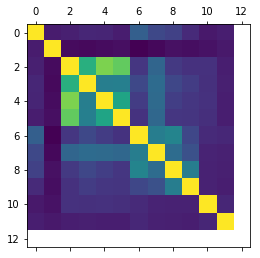

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.matshow(sarcmulti.corr()) 

C:\Users\Jamie\PycharmProjects\MastersProj\ProjectV2\venv\lib\site-packages\matplotlib\axes\_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
C:\Users\Jamie\PycharmProjects\MastersProj\ProjectV2\venv\lib\site-packages\matplotlib\axes\_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


LinAlgError: singular matrix

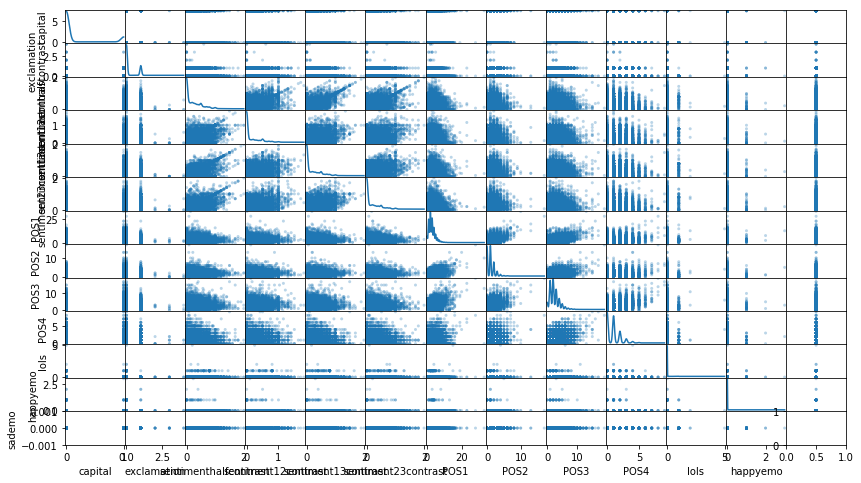

In [123]:
pd.plotting.scatter_matrix(sarcmulti, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

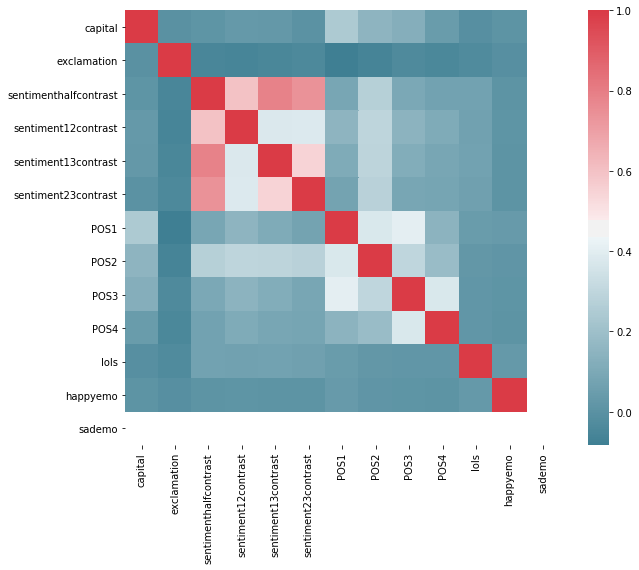

In [126]:
import seaborn as sns
try:
    f, ax = plt.subplots(figsize=(10, 8))
    corr = sarcmulti.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
except ValueError:  #raised if `y` is empty.
    pass
 

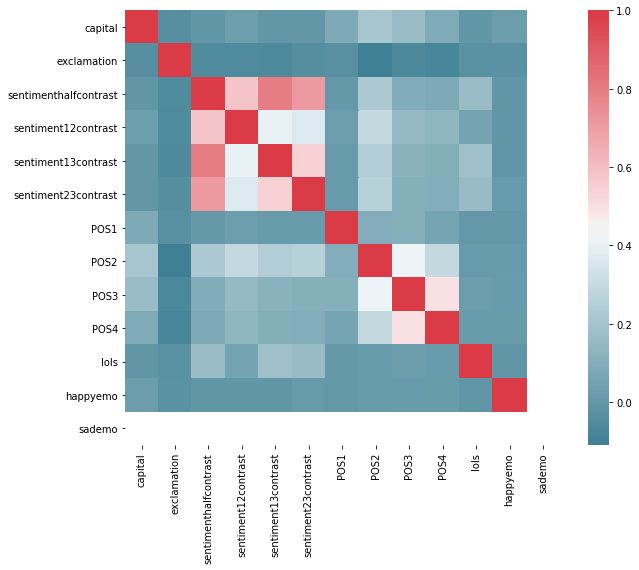

In [127]:

try:
    f, ax = plt.subplots(figsize=(10, 8))
    corr = negmulti.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
except ValueError:  #raised if `y` is empty.
    pass 

In [116]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns); 

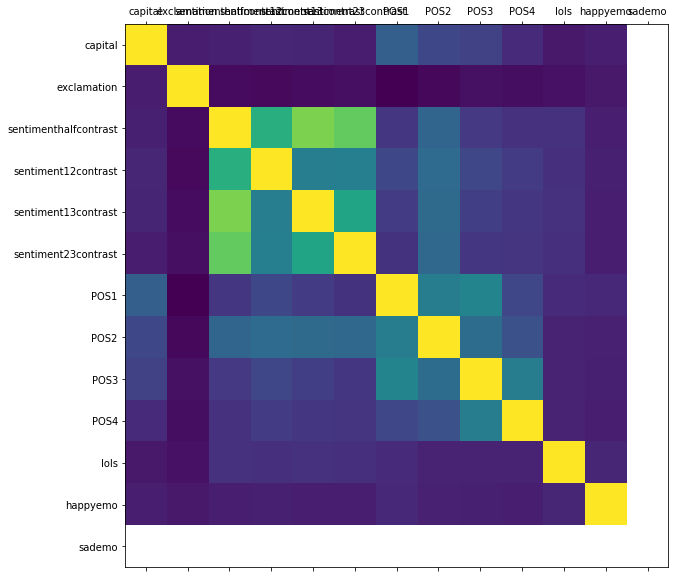

In [128]:
plot_corr(sarcmulti)